<font style="font-size:96px; font-weight:bolder; color:#0040a0"><img src="http://montage.ipac.caltech.edu/docs/M51_logo.png" alt="M" style="float: left; padding: 25px 30px 25px 0px;" /></font>

<i><b>Montage</b> is a general astronomical image toolkit with facilities for reprojection, background matching, coaddition and visualization.  It can be used as a set of command-line tools (Linux, OS X and Windows), C library calls (Linux and OS X) and as Python binary extension modules.</i>
    
<i>Montage source code can be downloaded from GitHub ( https://github.com/Caltech-IPAC/Montage ).  The Python package can be installed from PyPI ("pip install MontagePy"). See
http://montage.ipac.caltech.edu/ for more information.</i>

# MontagePy.main modules: mProjectPP

A large percentage of the Montage modules focus on processing a set of images (often retrieved from a mission archive); projecting them to a common frame, adjusting their background levels as a set, and coadding them into a mosaic.

This page is focused on the details of one of these modules: mProjectPP.  For a broader context, please see <a href="Mosaic.ipynb">Building a Mosaic with Montage</a> or the <a href="Mosaic_oneshot.ipynb"> one shot </a> version if you just want to see the commands.


<b>Note:</b> The MontagePy python package has no external dependencies. We include other utilities on this page to aid in visualizing MontagePy package results.


In [3]:
from MontagePy.main import mProjectPP, mViewer

help(mProjectPP)

Help on built-in function mProjectPP in module MontagePy.main:

mProjectPP(...)
    mProjectPP reprojects a single image to the scale defined in a FITS header template file. The program produces a pair of images: the reprojected image and an 'area' image consisting of the fraction input pixel sky area that went into each output pixel. The algorithm proceeds by mapping pixel corners (as adjusted by drizzle, if set) from the input pixel space to the output pixel space, calculating overlap area with each output pixel, and accumulating an appropriate fraction of the input flux into the output image pixels. In addition, the appropriate fraction of the input pixel area is accumulated into the area image pixels. Projection of points from input pixel space to output pixel space uses a special library that only works between two tangent plane projections (e.g. TAN, SIN, etc.) but given the popularity of these projections, mProjectPP can often be employed instead of the slower mProject.
    
   

## mProjectPP Example

mProjectPP is one of four modules focused on the task of reprojecting an astronomical image.  It is not as general as mProject, using a reprojection scheme developed for the Spitzer Space Telescope project that can only handle tangent plane projections, but it is much faster.  However, since tangent plane projections like TAN and SIN are very common, there are a lot of times when mProjectPP is the right choice.

In addition, the range of cases where mProjectPP is appropriate can often be extended to non-tangent-plane projections when the area of the image to be projected is small.  All our projection libraries can deal with focal plane distortions (<i>e.g.</i> TAN-SIP) and we have a tool (mTANHdr) that will attempt to fit for a set of polynomial distortion coeffients in a TAN-SIP projection that match, for instance, a given CAR cylindrical projection. If this fails, you have to resort to the full mProject.  This approach can be applied to both the input and output image headers.

mProjectPP has a number of extra controls for things like toggling from the normal flux-density mode to total energy mode or excluding a border (image borders often have bad pixels).  But the basic inputs are a FITS image and a FITS header describing the output image we want.  In all cases, the only output is a FITS image with the data from the input resampled to the output header pixel space.

The input FITS header (actually an ASCII file that looks like a FITS header but with newlines and unpadded line lengths) can be produced in a number of ways.  There are Montage tools to take an image list (or point source list) and determine a bounding box (mMakeHdr) or just a location and size (mHdr).  You can also pull the header off another file (mGetHdr) if you want to build a matching mosaic from other data.  Or you can just create the output header by hand (<i>e.g.</i>, a simple all-sky Aitoff projection).

Here we have pulled the header from the input image and edited it by hand to modify the rotation by 30 degrees.


In [4]:
import os

try:
   os.makedirs('work/M17')
except:
   pass

rtn = mProjectPP('M17/raw/2mass-atlas-990502s-j1340186.fits', 
                 'work/M17/2mass-atlas-990502s-j1340186_projectPP.fits', 
                 'M17/rotated.hdr')
print(rtn)

{'status': '0', 'time': 1.0}


## Before and After

Here are the original image and the reprojected one:

{'status': '0', 'type': b'grayscale', 'nx': 512, 'ny': 1024, 'grayminval': 142.85527071691192, 'grayminpercent': 0.0, 'grayminsigma': -2.0, 'graymaxval': 8543.951171875, 'graymaxpercent': 100.0, 'graymaxsigma': 2225.7597600568683, 'blueminval': 0.0, 'blueminpercent': 0.0, 'blueminsigma': 0.0, 'bluemaxval': 0.0, 'bluemaxpercent': 0.0, 'bluemaxsigma': 0.0, 'greenminval': 0.0, 'greenminpercent': 0.0, 'greenminsigma': 0.0, 'greenmaxval': 0.0, 'greenmaxpercent': 0.0, 'greenmaxsigma': 0.0, 'redminval': 0.0, 'redminpercent': 0.0, 'redminsigma': 0.0, 'redmaxval': 0.0, 'redmaxpercent': 0.0, 'redmaxsigma': 0.0, 'graydatamin': 143.695556640625, 'graydatamax': 8543.951171875, 'bdatamin': 0.0, 'bdatamax': 0.0, 'gdatamin': 0.0, 'gdatamax': 0.0, 'rdatamin': 0.0, 'rdatamax': 0.0, 'flipX': 0, 'flipY': 1, 'colortable': 1, 'bunit': b''}


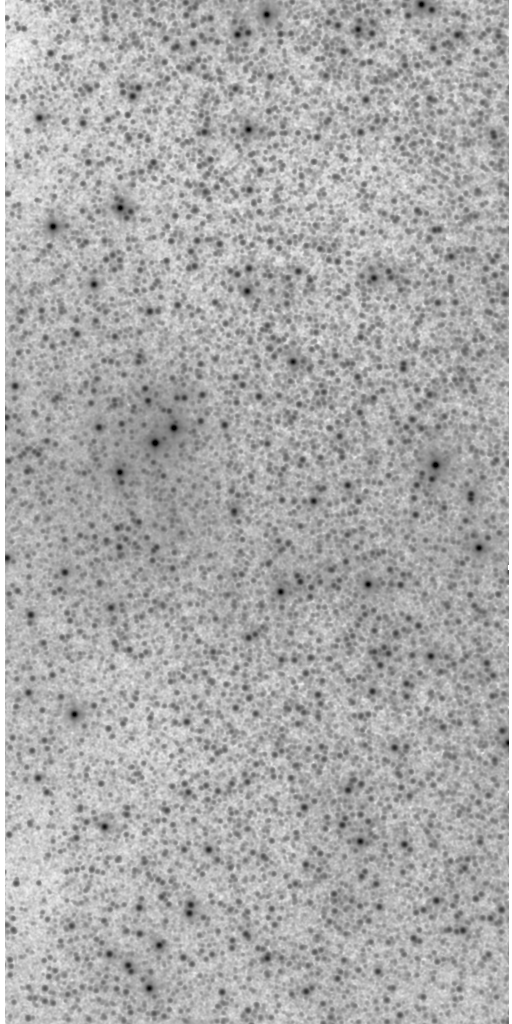

In [5]:
from IPython.display import Image

rtn = mViewer("-ct 1 -gray M17/raw/2mass-atlas-990502s-j1340186.fits \
               -2s max gaussian-log -out work/M17/2mass-atlas-990502s-j1340186.png",
              "", mode=2)
print(rtn)

Image(filename='work/M17/2mass-atlas-990502s-j1340186.png')

{'status': '0', 'type': b'grayscale', 'nx': 949, 'ny': 1139, 'grayminval': 142.8571855047901, 'grayminpercent': 0.0, 'grayminsigma': -2.0, 'graymaxval': 8294.205031072863, 'graymaxpercent': 100.0, 'graymaxsigma': 2140.42443673313, 'blueminval': 0.0, 'blueminpercent': 0.0, 'blueminsigma': 0.0, 'bluemaxval': 0.0, 'bluemaxpercent': 0.0, 'bluemaxsigma': 0.0, 'greenminval': 0.0, 'greenminpercent': 0.0, 'greenminsigma': 0.0, 'greenmaxval': 0.0, 'greenmaxpercent': 0.0, 'greenmaxsigma': 0.0, 'redminval': 0.0, 'redminpercent': 0.0, 'redminsigma': 0.0, 'redmaxval': 0.0, 'redmaxpercent': 0.0, 'redmaxsigma': 0.0, 'graydatamin': 143.86499774614586, 'graydatamax': 8294.205031072863, 'bdatamin': 0.0, 'bdatamax': 0.0, 'gdatamin': 0.0, 'gdatamax': 0.0, 'rdatamin': 0.0, 'rdatamax': 0.0, 'flipX': 0, 'flipY': 1, 'colortable': 1, 'bunit': b''}


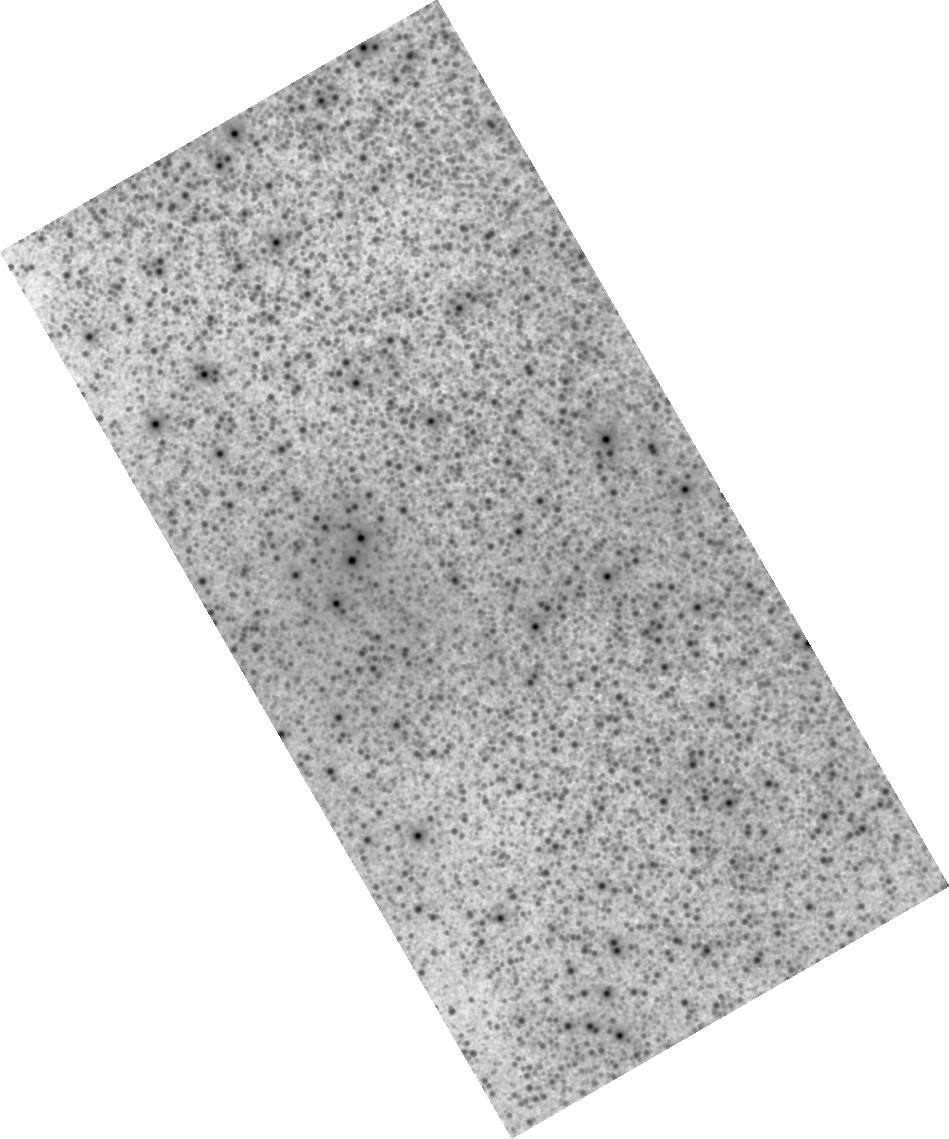

In [6]:
rtn = mViewer("-ct 1 -gray work/M17/2mass-atlas-990502s-j1340186_project.fits \
               -2s max gaussian-log -out work/M17/2mass-atlas-990502s-j1340186_projectPP.png",
              "", mode=2)
print(rtn)

Image(filename='work/M17/2mass-atlas-990502s-j1340186_projectPP.png')

## mProjectPP Error Handling

If mProjectPP encounters an error, the return structure will just have two elements: a status of 1 ("error") and a message string that tries to diagnose the reason for the error.

For instance, if the user asks for an image that doesn't exist:

In [8]:
rtn = mProjectPP('M17/raw/unknown.fits', 
                 'work/M17/2mass-atlas-990502s-j1340186_project.fits', 
                 'M17/rotated.hdr')
print(rtn)

{'status': '1', 'msg': b'File M17/raw/unknown.fits not found.'}


&nbsp;



# Using Montage Standalone


### mProjectPP Unix/Windows Command-line Arguments

<p>mProjectPP can also be run as a command-line tool in Linux, OS X, and Windows:</p>

<p><tt>
<b>Usage:</b> mProjectPP [-z factor][-d level][-b border][-s statusfile][-o altout.hdr][-i altin.hdr][-h hdu][-x scale][-w weightfile][-W fixed-weight][-t threshold][-X(expand)][-b border-string][-e(nergy-mode)][-f(ull-region)] in.fits out.fits template.hdr
</tt></p>
<p>&nbsp;</p>
<p>If you are writing in C/C++, mProjectPP can be accessed as a library function:</p>


<pre>
/*-***********************************************************************/
/*                                                                       */
/*  mProjectPP                                                           */
/*                                                                       */
/*  Montage is a set of general reprojection / coordinate-transform /    */
/*  mosaicking programs.  Any number of input images can be merged into  */
/*  an output FITS file.  The attributes of the input are read from the  */
/*  input files; the attributes of the output are read a combination of  */
/*  the command line and a FITS header template file.                    */
/*                                                                       */
/*  This module, mProjectPP, processes a single input image and          */
/*  projects it onto the output space.  It's output is actually a pair   */
/*  of FITS files, one for the sky flux the other for the fractional     */
/*  pixel coverage. Once this has been done for all input images,        */
/*  mAdd can be used to coadd them into a composite output.              */
/*                                                                       */
/*  mProjectPP is a 'special case' version of mProject and can be used   */
/*  only where the input and output images have tangent-plane            */
/*  projections (e.g. TAN, SIN) or where they can be approximated by     */
/*  a 'pseudo-TAN' header as determined by mTANHdr.                      */
/*                                                                       */
/*  Each input pixel is projected onto the output pixel space and the    */
/*  exact area of overlap is computed.  Both the total 'flux' and the    */
/*  total sky area of input pixels added to each output pixel is         */
/*  tracked, and the flux is appropriately normalized before writing to  */
/*  the final output file.  This automatically corrects for any multiple */
/*  coverages that may occur.                                            */
/*                                                                       */
/*  The input can come from from arbitrarily disparate sources.  It is   */
/*  assumed that the flux scales in the input images match, but this is  */
/*  not required (leading to some interesting combinations).             */
/*                                                                       */
/*   char  *input_file     FITS file to reproject                        */
/*   char  *output_file    Reprojected FITS file                         */
/*   char  *template_file  FITS header file used to define the desired   */
/*                         output                                        */
/*                                                                       */
/*   int    hdu            Optional HDU offset for input file            */
/*   char  *weight_file    Optional pixel weight FITS file (must match   */
/*                         input)                                        */
/*                                                                       */
/*   double fixedWeight    A weight value used for all pixels            */
/*   double threshold      Pixels with weights below this level treated  */
/*                         as blank                                      */
/*                                                                       */
/*   char  *borderstr      Optional string that contains either a border */
/*                         width or comma-separated 'x1,y1,x2,y2, ...'   */
/*                         pairs defining a pixel region polygon where   */
/*                         we keep only the data inside.                 */
/*                                                                       */
/*   char  *altin          Alternate psuedo-TAN header for input.        */
/*   char  *altout         Alternate psuedo-TAN header for output.       */
/*                                                                       */
/*   double drizzle        Optional pixel area 'drizzle' factor          */
/*   double fluxScale      Scale factor applied to all pixels            */
/*   int    energyMode     Pixel values are total energy rather than     */
/*                         energy density                                */
/*   int    expand         Expand output image area to include all of    */
/*                         the input pixels                              */
/*   int    fullRegion     Do not 'shrink-wrap' output area to non-blank */
/*                         pixels                                        */
/*   int    debug          Debugging output level                        */
/*                                                                       */
/*************************************************************************/

struct mProjectPPReturn *mProjectPP(char *input_file, char *ofile, char *template_file, int hduin,
                                    char *weight_file, double fixedWeight, double threshold, char *borderstr, 
                                    char *altin, char *altout, double drizzle, double fluxScale, int energyMode,
                                    int expand, int fullRegion, int debugin)
</pre>
<p><b>Return Structure</b></p>
<pre>
struct mProjectPPReturn
{
   int    status;        // Return status (0: OK, 1:ERROR)
   char   msg [1024];    // Return message (for error return)
   char   json[4096];    // Return parameters as JSON string
   double time;          // Run time (sec)   
};
</pre>